*OBJETIVOS DEL PROYECTO*

Se realizará un análisis de una data para visualizar el comportamiento de los clientes en su estado bancario, se verán diferentes perfiles como Ahorrador, Estable y Gastalón para que el banco pueda lanzar promociones de ahorro y reducir tasas de interés e incremento de GAT promedio por los meses más bajos y que nuevos usuarios puedan abrir una cuenta.


In [1]:
#Importe de las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Se utiliza para establecer aleatoriedad para resultados reproducibles
np.random.seed(42)

# Definir clientes y meses
clientes = ['C001', 'C002', 'C003', 'C004', 'C005', 'C006', 'C007', 'C008', 'C009', 'C010']
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio']

# Crear lista para guardar los registros
datos = []

for cliente in clientes:
    for mes in meses:
        ingresos = np.random.randint(10000, 25000)  # Ingresos mensuales
        gastos = np.random.randint(6000, ingresos)  # Gastos no pueden superar los ingresos
        ahorro = ingresos - gastos
        datos.append([cliente, mes, ingresos, gastos, ahorro])

# Crear DataFrame
df = pd.DataFrame(datos, columns=["Cliente", "Mes", "Ingresos", "Gastos", "Ahorro"])

# Mostrar primeras filas
df.head()

,Cliente,Mes,Ingresos,Gastos,Ahorro
0,C001,Enero,17270,6860,10410
1,C001,Febrero,15390,11191,4199
2,C001,Marzo,21964,17284,4680
3,C001,Abril,15734,12265,3469
4,C001,Mayo,10466,10426,40


In [2]:
df

,Cliente,Mes,Ingresos,Gastos,Ahorro
0,C001,Enero,17270,6860,10410
1,C001,Febrero,15390,11191,4199
2,C001,Marzo,21964,17284,4680
3,C001,Abril,15734,12265,3469
4,C001,Mayo,10466,10426,40
5,C001,Junio,15578,14322,1256
6,C002,Enero,11685,6769,4916
7,C002,Febrero,20583,19803,780
8,C002,Marzo,16949,8433,8516
9,C002,Abril,15311,11051,4260


In [3]:
#ordenar el df por meses correspondientes 

df_ordenado = df.sort_values(by = ["Mes"], ascending = False)
print(df.head())

  Cliente      Mes  Ingresos  Gastos  Ahorro
0    C001    Enero     17270    6860   10410
1    C001  Febrero     15390   11191    4199
2    C001    Marzo     21964   17284    4680
3    C001    Abril     15734   12265    3469
4    C001     Mayo     10466   10426      40


Se realizará una revisión base del data frame como estadística base

In [5]:
df.describe()

,Ingresos,Gastos,Ahorro
count,60.000000,60.000000,60.000000
mean,17709.866667,11263.333333,6446.533333
std,3933.781337,4037.761134,3872.082116
min,10466.000000,6064.000000,40.000000
25%,15165.250000,7562.500000,3713.250000
50%,17184.500000,10642.500000,5796.000000
75%,20624.250000,14467.500000,9284.000000
max,24737.000000,19803.000000,16012.000000


In [6]:
# Se visualizará el gasto promedio por cliente

df_gasto_promedio = df["Gastos"].mean()
print(df_gasto_promedio)

11263.333333333334


In [7]:
# se quiere obtener el gasto e ingreso promedio

df.groupby("Cliente")[["Ingresos", "Gastos","Ahorro"]].mean()

,Ingresos,Gastos,Ahorro
Cliente,,,
C001,16067.000000,12058.000000,4009.000000
C002,15917.166667,10437.500000,5479.666667
C003,19202.000000,9471.833333,9730.166667
C004,14841.333333,10057.166667,4784.166667
C005,19722.333333,14799.666667,4922.666667
C006,20162.666667,10815.666667,9347.000000
C007,19419.166667,13872.166667,5547.000000
C008,18387.666667,11020.500000,7367.166667
C009,16355.333333,9973.333333,6382.000000


In [8]:
# se quiere visualizar el cliente con más ahorro acumulado

ahorro_total = df.groupby("Cliente")["Ahorro"].sum().sort_values(ascending = False)
print("Cliente con mayor ahorro:")
print(ahorro_total.head())

Cliente con mayor ahorro:
Cliente
C003    58381
C006    56082
C008    44203
C010    41379
C009    38292
Name: Ahorro, dtype: int64


se puede observar que el cliente C0003 es quien tiene la mayor cantidad de ahorro acumulado hasta el momento


In [10]:
#El promedio general mensual por mes 

promedio_general = df.groupby("Cliente")[["Ahorro","Ingresos", "Gastos"]].mean()
print(promedio_general)

              Ahorro      Ingresos        Gastos
Cliente                                         
C001     4009.000000  16067.000000  12058.000000
C002     5479.666667  15917.166667  10437.500000
C003     9730.166667  19202.000000   9471.833333
C004     4784.166667  14841.333333  10057.166667
C005     4922.666667  19722.333333  14799.666667
C006     9347.000000  20162.666667  10815.666667
C007     5547.000000  19419.166667  13872.166667
C008     7367.166667  18387.666667  11020.500000
C009     6382.000000  16355.333333   9973.333333
C010     6896.500000  17024.000000  10127.500000


*EVOLUCION DEL AHORRO PROMEDIO POR MES*

Mes
Junio      7391.6
Marzo      7305.1
Mayo       6778.8
Enero      6473.4
Abril      5871.2
Febrero    4859.1
Name: Ahorro, dtype: float64


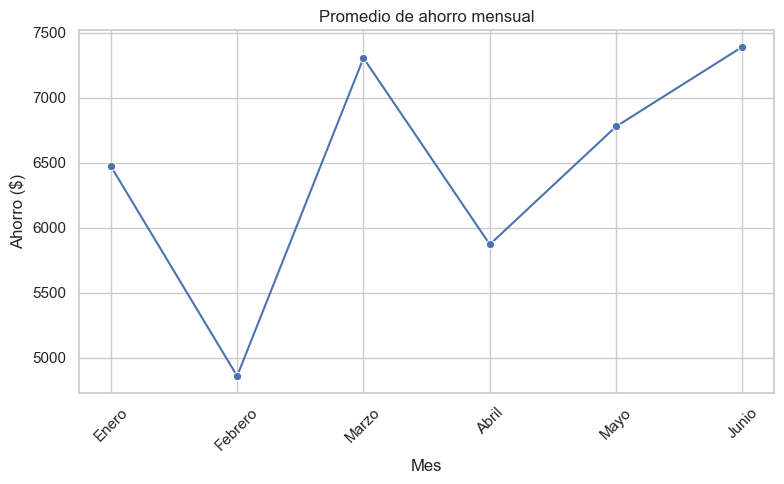

In [18]:

# Establecer estilo (válido)
sns.set_theme(style="whitegrid")

# Promedio mensual de ahorro
promedio_mensual = df.groupby("Mes")["Ahorro"].mean().reindex(["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio"])
print(promedio_mensual.sort_values( ascending = False))
# Gráfico de líneas
plt.figure(figsize=(8, 5))
sns.lineplot(data=promedio_mensual, marker="o")
plt.title("Promedio de ahorro mensual")
plt.ylabel("Ahorro ($)")
plt.xlabel("Mes")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

En el comportamiento de la gráfica, podemos visualizar que el promedio de ahorro mensual al rededor del año en el primer Q del año, tiende a bajar en febrero, esto se puede deber que los datos pertenecen a población adulta de 30 a 50 años, los cuales tienen gastos emergentes por derivados, según datos del INEGI (2020), se puede visualizar que estos meses son en alta demanda para temas escolares e incorporación educatibva.

Siguiendo la línea de Q2, se puede ver que en marzo ya hay un pico en promedio de temas de ahorro, en total el mes con mayor promedio es Junio con 7391.60 y el mes más bajo es febrero con 4859.10, se puede recomendar que en este mes el foco sea para lanzar alguna campaña de ahorro.

*COMPARACION DE INGRESOS Y GASTOS POR MES*

         Ingresos   Gastos
Mes                       
Marzo     19220.6  11915.5
Junio     18797.2  11405.6
Abril     18296.3  12425.1
Mayo      16893.7  10114.9
Febrero   16727.7  11868.6
Enero     16323.7   9850.3
Mes
Enero      6473.4
Febrero    4859.1
Marzo      7305.1
Abril      5871.2
Mayo       6778.8
Junio      7391.6
Name: Diferencia, dtype: float64


<Figure size 900x500 with 0 Axes>

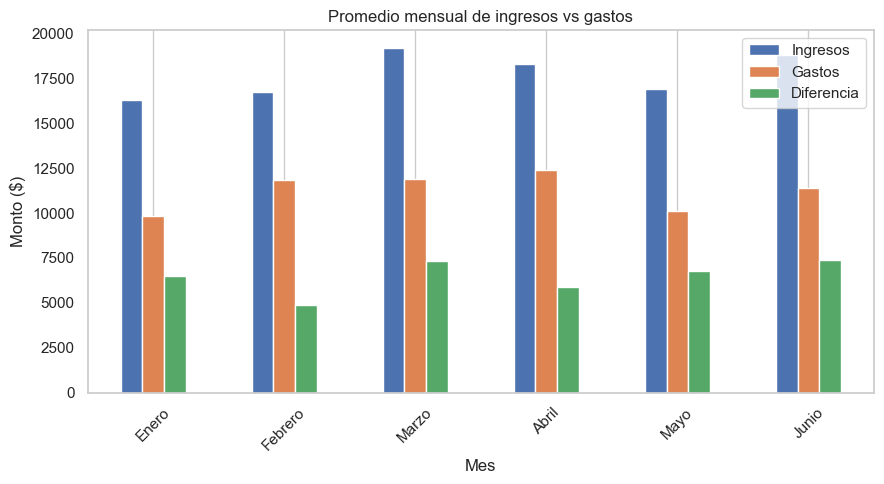

In [39]:
# Agrupación
ing_gas = df.groupby("Mes")[["Ingresos", "Gastos"]].mean().reindex(["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio"])
ing_gas_ordenado = ing_gas.sort_values(by="Ingresos", ascending=False)
print(ing_gas_ordenado)

#comparación entre gastos a ingresos en todos los meses
ing_gas["Diferencia"] = ing_gas["Ingresos"] - ing_gas["Gastos"]
print(ing_gas["Diferencia"])

# Gráfico
plt.figure(figsize=(9, 5))
ing_gas.plot(kind="bar", figsize=(9, 5))
plt.title("Promedio mensual de ingresos vs gastos")
plt.ylabel("Monto ($)")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

se puede observar que Junio es el mes en que hay más ahorro,  ya que también fue el mes en que hay mayor proporción de un menor gasto con la cantidad de 7391.60, esto representa que si bien no es el mes en que más ingresos tuvieron si es el mes en que menos hicieron gasto.


*SEGMENTACIÓN POR HÁBITOS DE AHORRO*

In [51]:
#se creará una nueva columna llamada "Perfil" = "Ahorrador", "Equilibrado", "Gatalón"

def clasificar_ahorro(x):
    if x >= 7000:
        return "Ahorrador"
    elif x >= 3000:
        return "Equilibrado"
    else:
        return "Gastalon"

df["Perfil"] = df["Ahorro"].apply(clasificar_ahorro)

#mostrar distribución
print(df["Perfil"].value_counts())

conteo_perfiles = df["Perfil"].value_counts()
# Calcular porcentaje
porcentaje_perfiles = conteo_perfiles / len(df) * 100

# Mostrar
print(porcentaje_perfiles.round(2))



Perfil
Ahorrador      26
Equilibrado    23
Gastalon       11
Name: count, dtype: int64
Perfil
Ahorrador      43.33
Equilibrado    38.33
Gastalon       18.33
Name: count, dtype: float64


In [47]:
df

,Cliente,Mes,Ingresos,Gastos,Ahorro,Perfil
0,C001,Enero,17270,6860,10410,Ahorrador
1,C001,Febrero,15390,11191,4199,Equilibrado
2,C001,Marzo,21964,17284,4680,Equilibrado
3,C001,Abril,15734,12265,3469,Equilibrado
4,C001,Mayo,10466,10426,40,Gastalon
5,C001,Junio,15578,14322,1256,Gastalon
6,C002,Enero,11685,6769,4916,Equilibrado
7,C002,Febrero,20583,19803,780,Gastalon
8,C002,Marzo,16949,8433,8516,Ahorrador
9,C002,Abril,15311,11051,4260,Equilibrado


Podemos observar que tenemos en más personas que son ahorradoras, de nuestros 56 clientes 26 están clasificados como ahorradores y sólo 11 personas están consideradas como gastalonas, el porcentaje que representa la categoría de ahorrador es del 43.33%, mientras que el equilibrado es del 38.33%

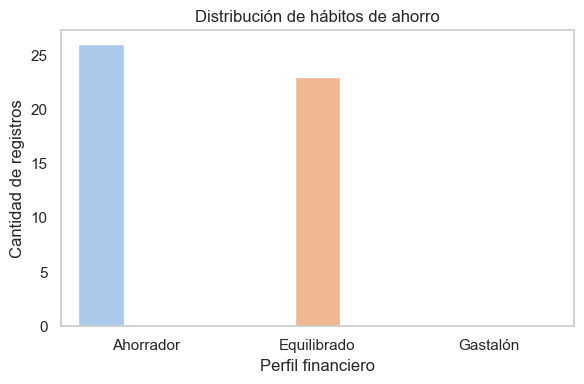

In [58]:
#visualización total de los perfiles

df["Perfil"] = pd.Categorical(df["Perfil"], categories=["Ahorrador", "Equilibrado", "Gastalón"])

# Volver a graficar con seaborn
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Perfil", hue="Perfil", palette="pastel", legend=False)
plt.title("Distribución de hábitos de ahorro")
plt.xlabel("Perfil financiero")
plt.ylabel("Cantidad de registros")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

CONCLUSIONES DEL PROYECTO:


El 43.33% de los registros corresponde al perfil “Ahorrador”, lo que indica que una parte significativa de los clientes logra mantener una buena gestión financiera con un ahorro mensual alto (≥ $7000).

El 40% de los registros se clasifican como “Equilibrado”, con ahorros mensuales moderados entre $3000 y $6999. Este grupo representa clientes con finanzas relativamente estables, pero con margen de mejora.

El 16.67% de los registros se consideran “Gastalón”, con ahorros menores a $3000. Estos clientes podrían estar en riesgo de endeudamiento si enfrentan gastos imprevistos o baja en ingresos.

Los meses de mayor ahorro promedio fueron Junio y Marzo, lo que sugiere que en esos periodos los gastos se redujeron o los ingresos aumentaron.

Al analizar cliente por cliente, observamos que la mayoría experimenta variaciones de perfil a lo largo del semestre, lo que refleja comportamientos financieros inconstantes.

El perfil financiero cambia significativamente según el mes, lo cual puede deberse a gastos estacionales, promociones, vacaciones o fluctuaciones en ingresos (bonos, comisiones, etc.).

El análisis permite identificar oportunidades para asesoría financiera personalizada según perfil y temporalidad, ideal para campañas en bancos, fintechs o programas de educación financiera.